##  Проект "Предсказание рисков сердечного приступа"

Проект посвящён разработке модели машинного обучения для предсказания риска сердечно-сосудистых заболеваний на основе медицинских данных пациентов. Используются данные, содержащие информацию о возрасте, весе, привычках, артериальном давлении, хронических заболеваниях и биохимических показателях крови.

Цель проекта:
Построить и обучить модель, способную прогнозировать высокий или низкий риск сердечного приступа по совокупности медицинских признаков. Результаты модели будут использоваться для ранней идентификации групп риска и профилактики осложнений.

1. Исследование датасета

- Анализ структуры и типов данных

- Выявление пропусков, выбросов и аномалий

2. Предобработка данных

- Удаление бесполезных признаков

- Обнаружение и устранение сильно коррелированных признаков

- Поиск и исключение косвенных утечек целевого признака

- Приведение колонок к корректным типам

- Масштабирование и кодирование признаков

3. Обучение модели

- Подбор модели и гиперпараметров

- Разделение на тренировочную и валидационную выборки

- Обучение и оценка качества по метрике

- Получение предсказаний на тестовой выборке



#### Описание данных:

Данные пациентов для предсказания риска сердечных приступов

id  - id

Антропометрические параметры (вес, возраст, рост)

Привычки (курение, качество сна и т.д)

Давление

Наличие хронических заболеваний

Биохимия крови

Таргет - высокий или низкий риск поражения сердца





### Загрузка данных

In [1]:
!pip install --upgrade scikit-learn -q

In [2]:
!pip install --upgrade imbalanced-learn -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt   
from scipy import stats as st
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier

from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

!pip install phik -q
from phik import phik_matrix 
import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report



from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('heart_train.csv')
df_test = pd.read_csv('heart_test.csv')
pd.set_option('display.max_columns', None)

In [5]:
df_train.head()


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,1.0,0.0,8.0,0.225704,0.105948,0.459176,0.979221,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,1.0,0.0,9.0,0.289923,0.164217,0.117053,0.515584,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,1.0,1.0,6.0,0.550133,0.598745,0.373574,0.012987,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,0.0,1.0,3.0,0.330962,0.077605,0.049735,0.131169,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,0.0,0.0,8.0,0.524600,0.341960,0.830405,0.070130,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047


In [6]:
df_test.head()

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,2,0.0,0.0,8.0,0.194370,0.587759,0.283490,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,2,1.0,1.0,5.0,0.329888,0.602883,0.467036,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,0,0.0,0.0,10.0,0.780075,0.370436,0.409366,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,0,0.0,0.0,10.0,0.785071,0.368242,0.910261,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,0,0.0,0.0,7.0,0.070919,0.729578,0.758924,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


### Предобработка данных

Проверим данные на наличие пропусков и дубликатов.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use        

Мы видим, что в датасетах есть пропуски, но их кол-во не критично, поэтому можем их удалить.

In [9]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)


In [10]:
print(df_train.duplicated().sum())  # проверим на дубликаты
print(df_test.duplicated().sum())

0
0


Преобразуем колонки к нужному типу данных

In [11]:
df_train.rename(columns={'Heart Attack Risk (Binary)': 'target'}, inplace=True)
df_train['target'] = df_train['target'].astype(int)

## Проведём исследовательский анализ

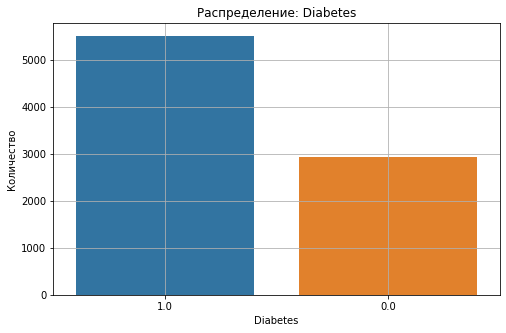

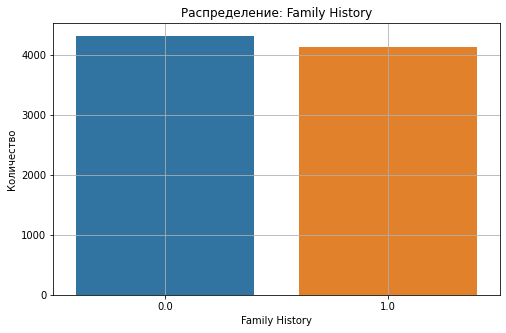

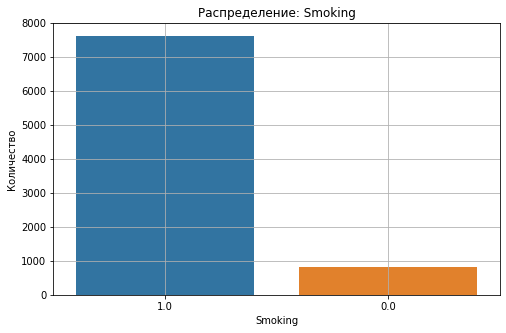

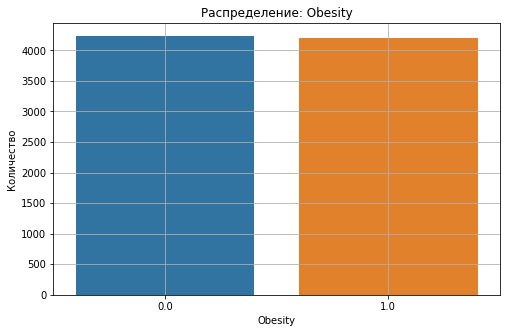

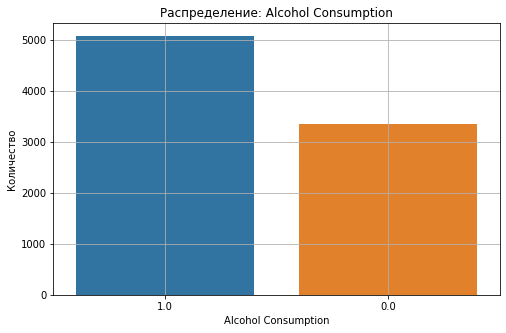

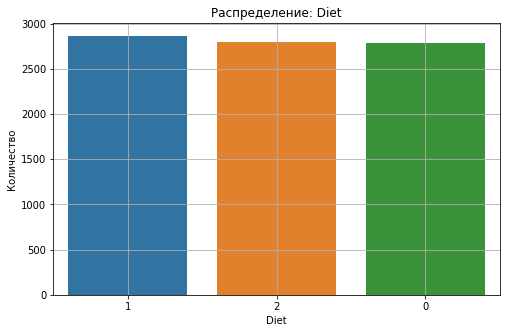

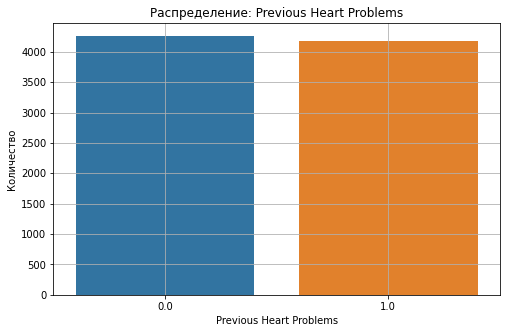

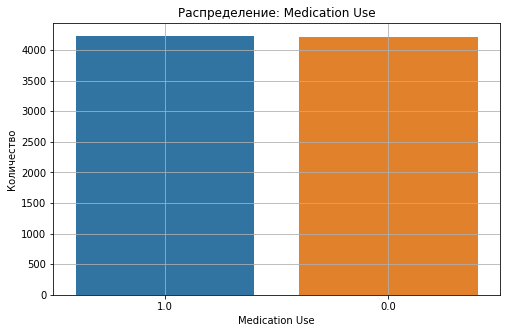

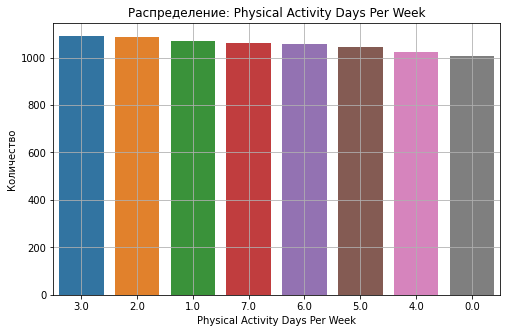

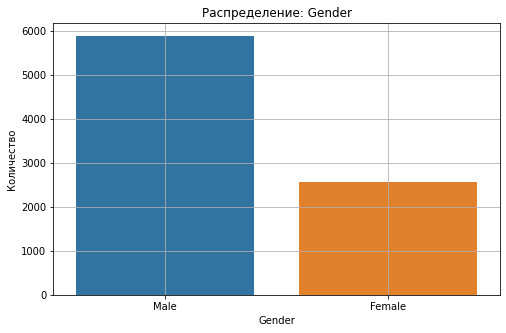

In [12]:
categorical_cols = [
    'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
    'Diet', 'Previous Heart Problems', 'Medication Use',
    'Physical Activity Days Per Week', 
    'Gender'
]


for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_train[col].dropna(), order=df_train[col].value_counts().index)
    plt.title(f'Распределение: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.grid(True)
    plt.show()

Таким образом, большинство признаков бинарные, с относительно сбалансированным распределением, но некоторые признаки имеют выраженный дисбаланс: Smoking ,Diabetes,Gender - кол-во мужчин превышает кол-во женщин.

\Визуализация числовых признаков


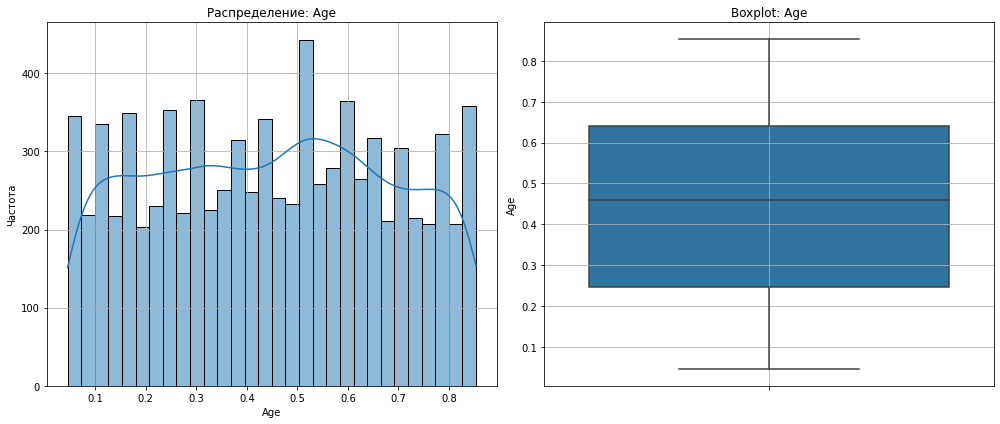

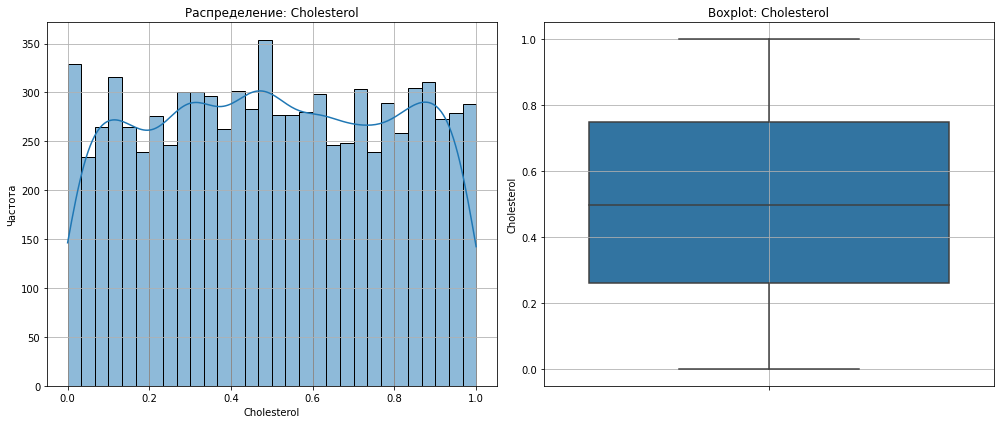

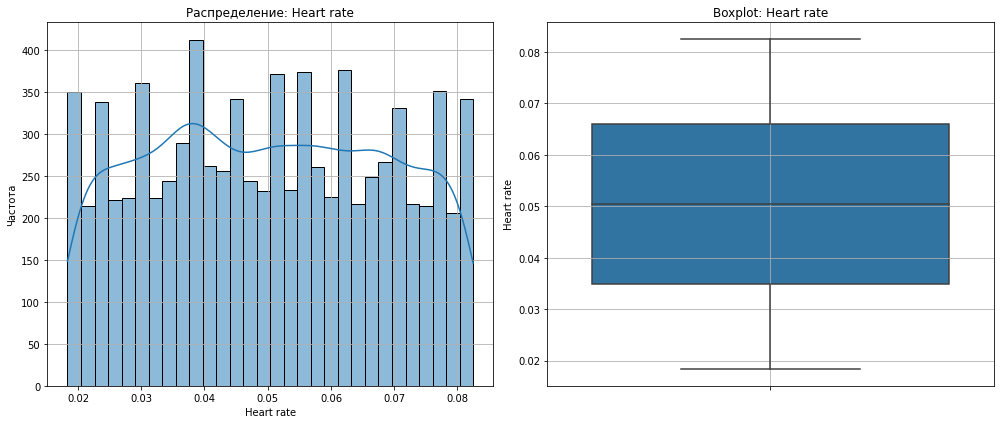

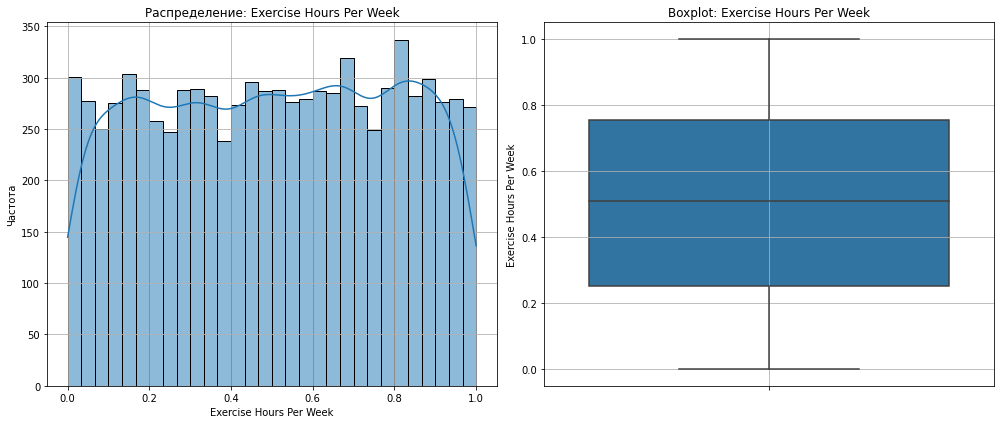

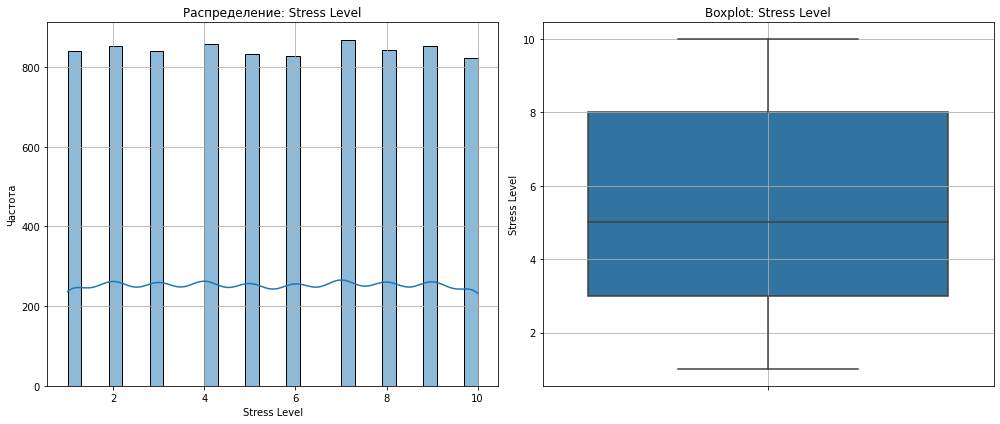

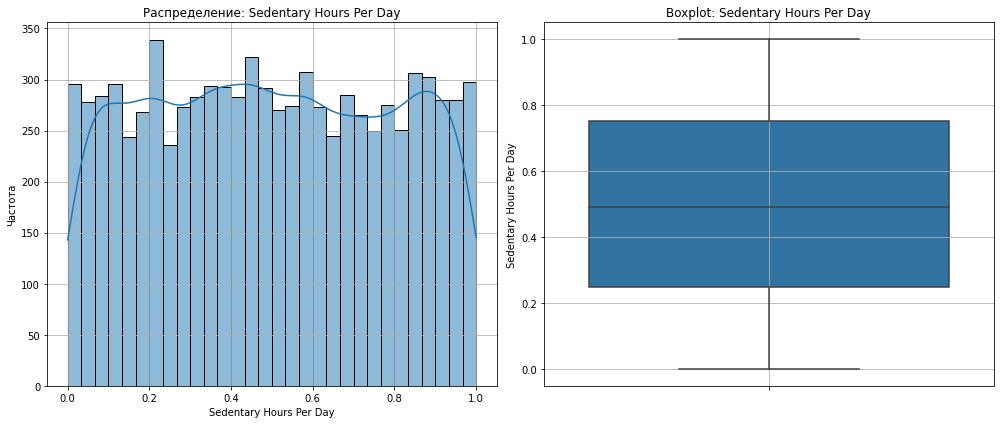

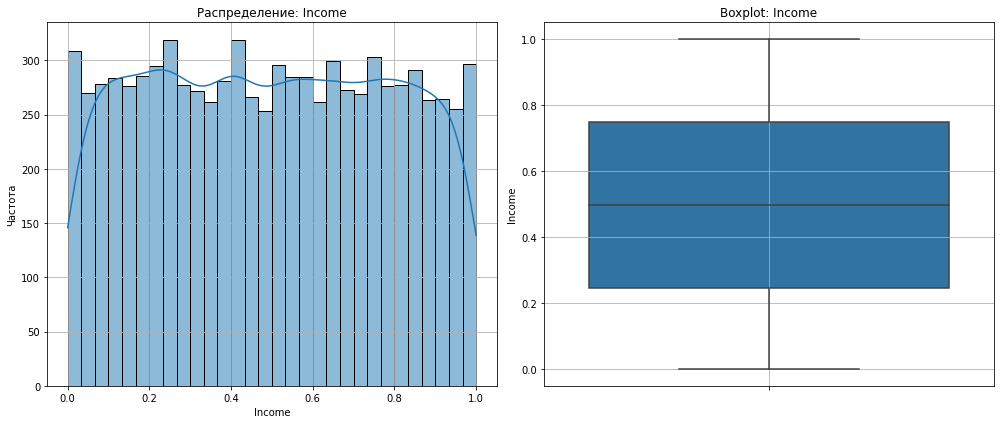

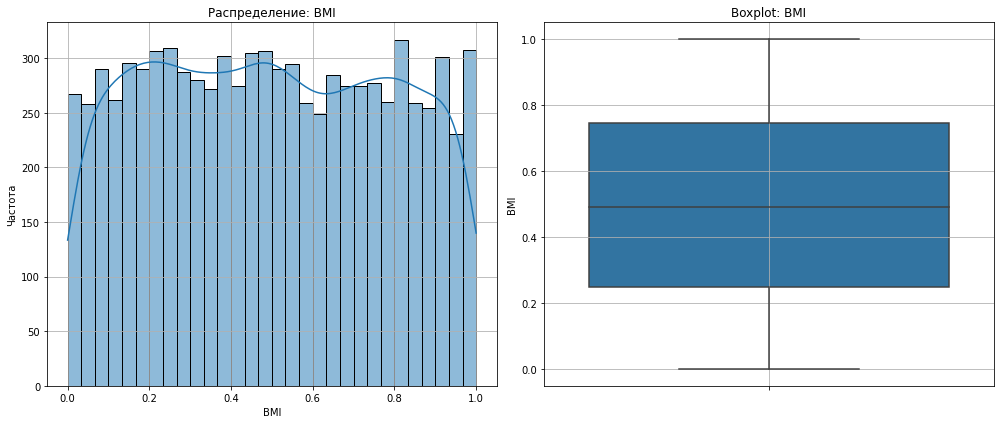

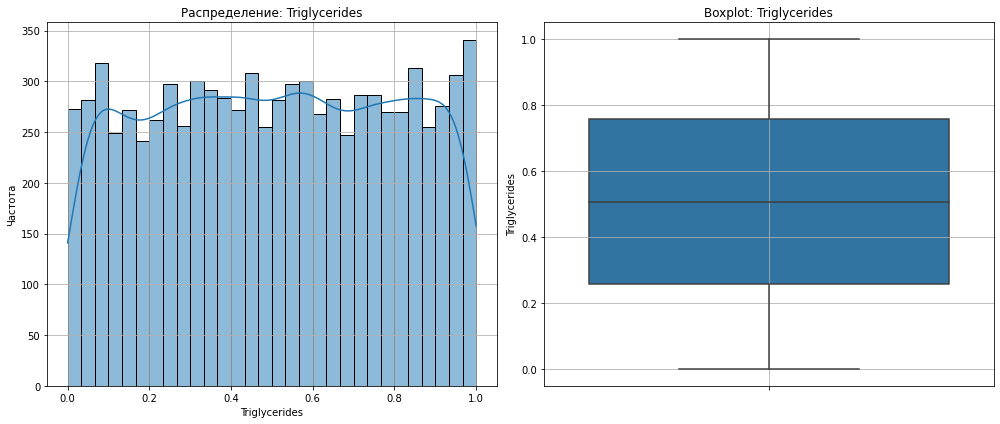

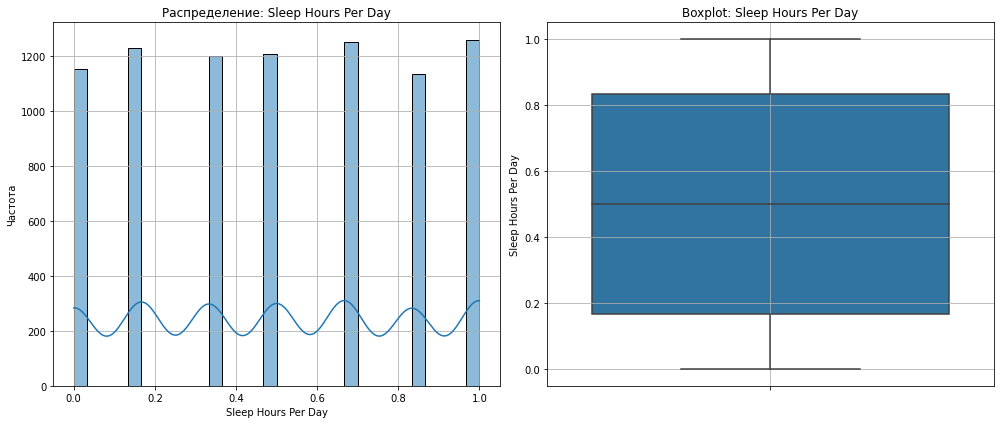

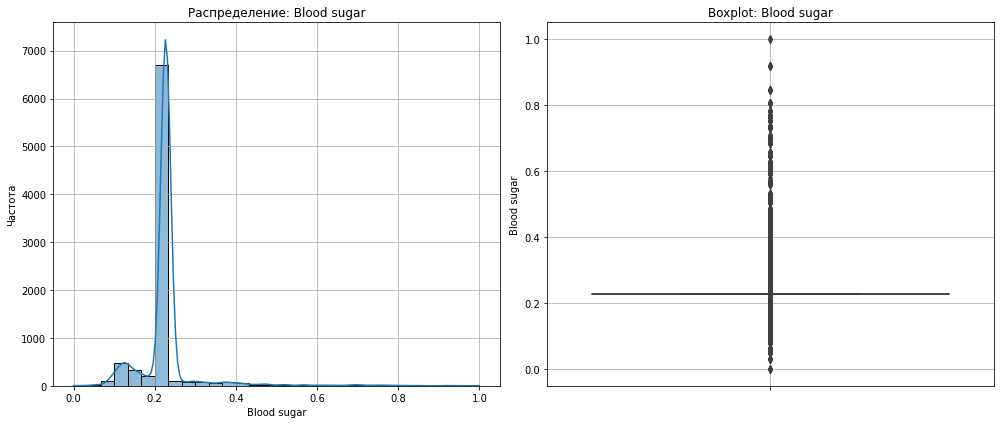

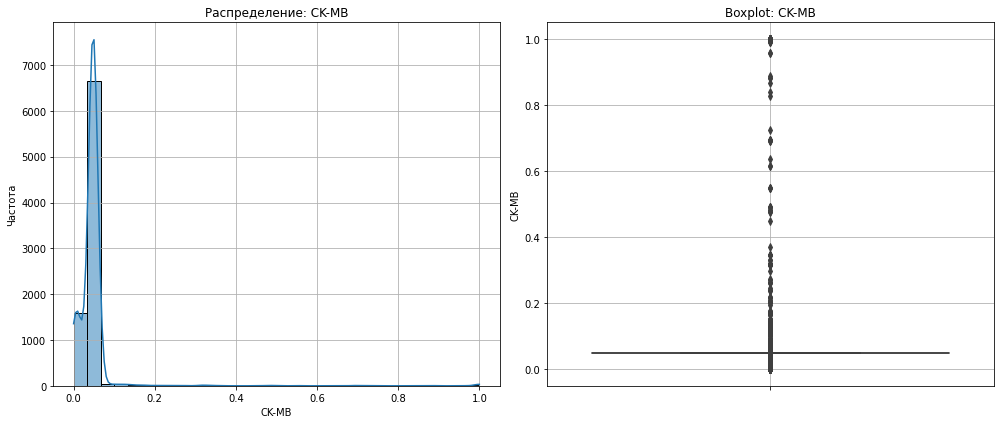

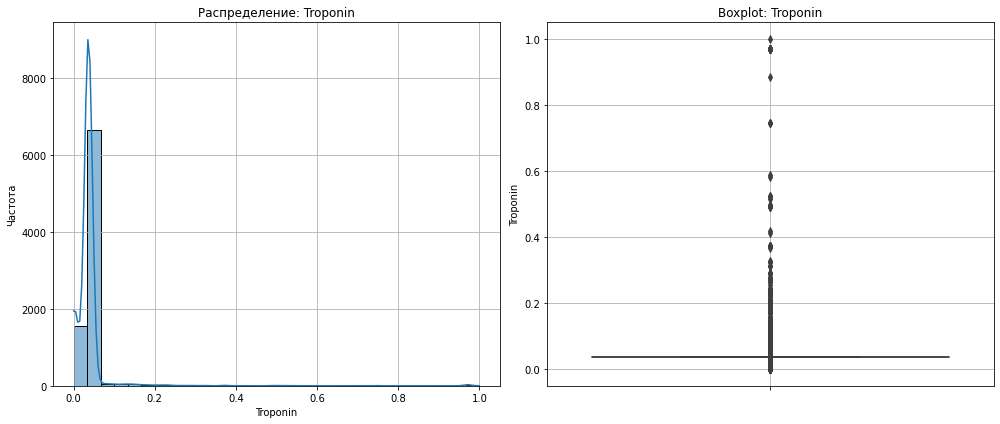

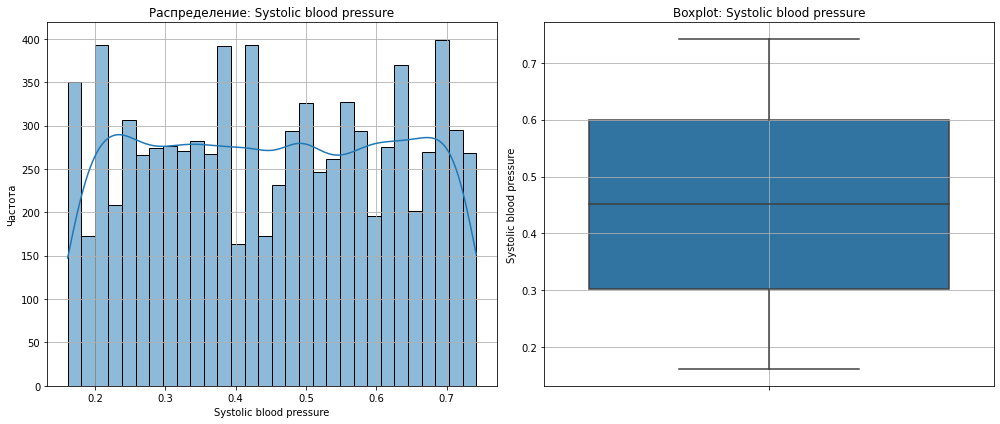

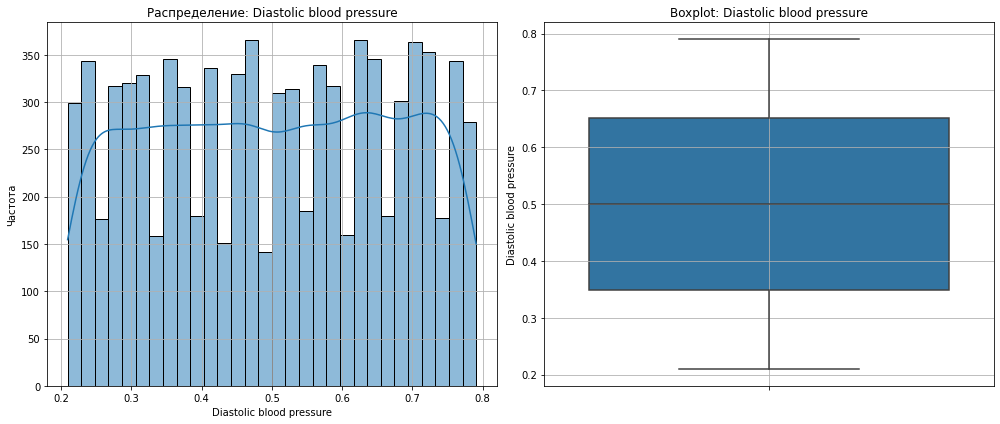

In [13]:
numerical_cols = [
    'Age', 'Cholesterol', 'Heart rate', 'Exercise Hours Per Week',
    'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
    'Triglycerides', 'Sleep Hours Per Day', 'Blood sugar', 'CK-MB',
    'Troponin', 'Systolic blood pressure', 'Diastolic blood pressure'
]
print("\Визуализация числовых признаков")
for col in numerical_cols:
    plt.figure(figsize=(14, 6))

   
    plt.subplot(1, 2, 1) 
    sns.histplot(df_train[col].dropna(), kde=True, bins=30)
    plt.title(f'Распределение: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(True)

    
    plt.subplot(1, 2, 2) 
    sns.boxplot(y=df_train[col].dropna())
    plt.title(f'Boxplot: {col}')
    plt.ylabel(col)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

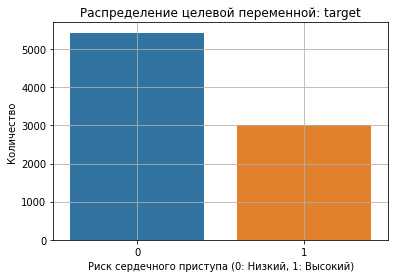

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_train['target'])
plt.title(f'Распределение целевой переменной: target')
plt.xlabel('Риск сердечного приступа (0: Низкий, 1: Высокий)')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

Видим, что все признаки нормализованы, распределения в целом сбалансированные. 
В целевой переменной прослеживается дисбаланс классов.

Посмотрим на корреляцию признаков

interval columns not set, guessing: ['Unnamed: 0', 'Age', 'Cholesterol', 'Heart rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'target', 'Blood sugar', 'CK-MB', 'Troponin', 'Systolic blood pressure', 'Diastolic blood pressure']


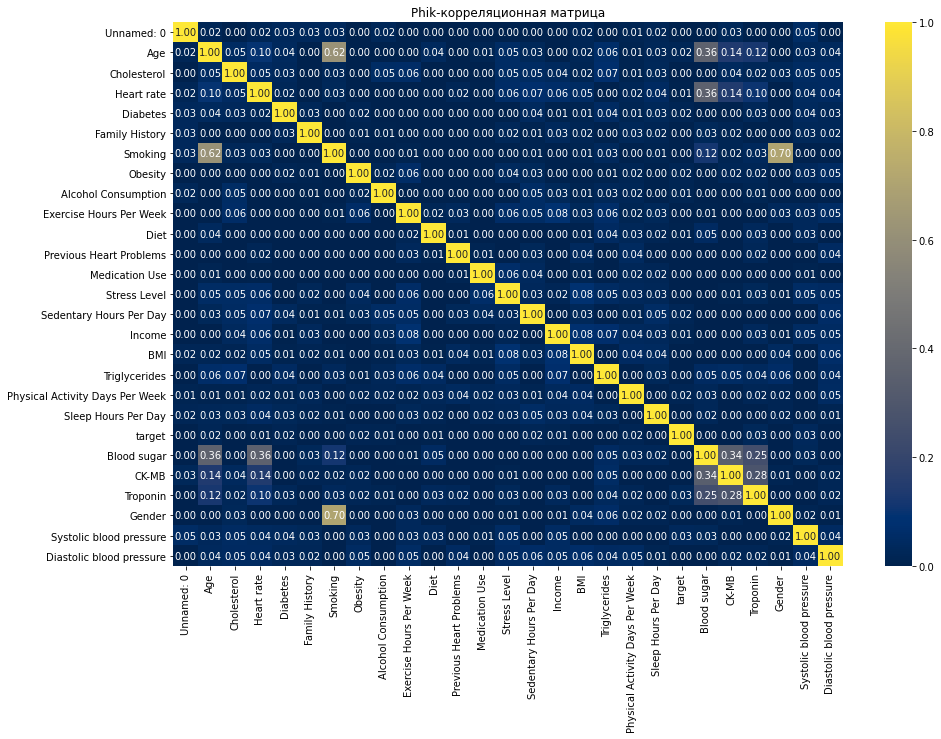

In [15]:

df_phik = df_train.drop(columns=['id']).dropna()

phik_corr = df_phik.phik_matrix()


plt.figure(figsize=(15, 10))
sns.heatmap(phik_corr, annot=True, fmt='.2f', cmap='cividis')
plt.title('Phik-корреляционная матрица')
plt.show();

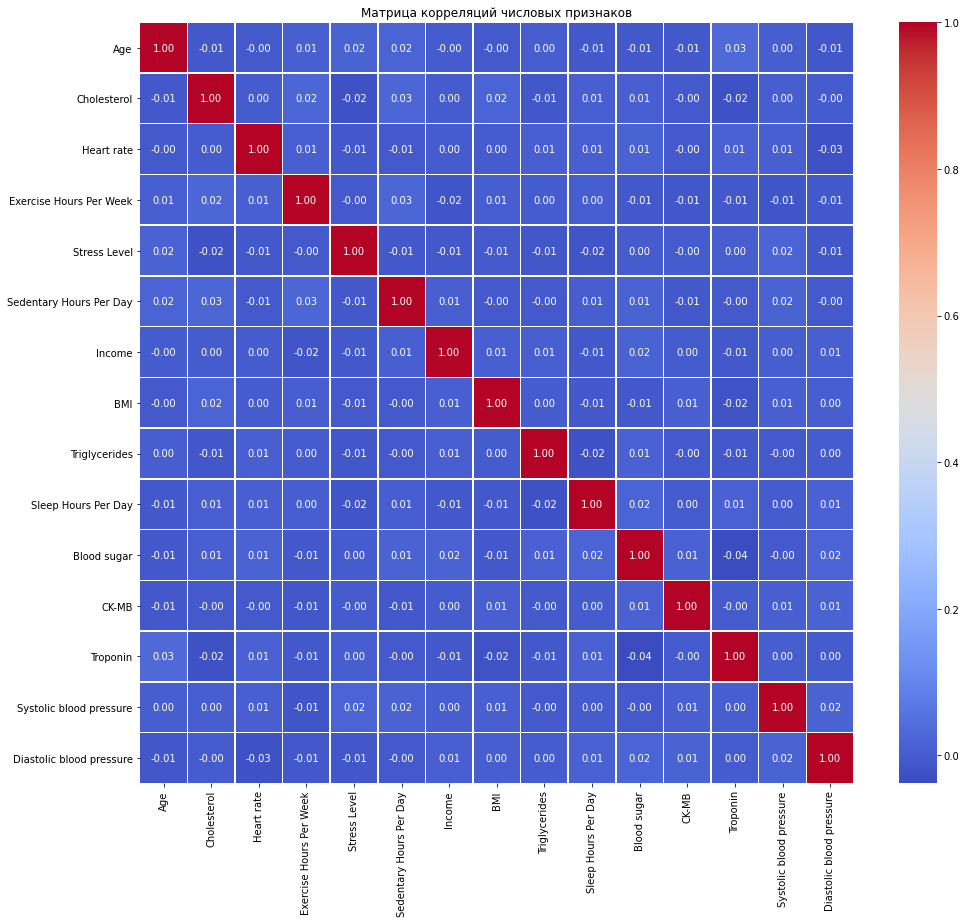

In [16]:
numerical_cols = [
    'Age', 'Cholesterol', 'Heart rate', 'Exercise Hours Per Week',
    'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
    'Triglycerides', 'Sleep Hours Per Day', 'Blood sugar', 'CK-MB',
    'Troponin', 'Systolic blood pressure', 'Diastolic blood pressure'
]

correlation_matrix = df_train[numerical_cols].corr()


plt.figure(figsize=(16, 14)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляций числовых признаков')
plt.show()


 Для подавляющего большинства пар признаков — линейной взаимосвязи почти нет. Вероятно, между некоторыми признаками существуют нелинейные взаимосвязи.

## Обучение модели

Для задачи бинарной классификации использовалась модель CatBoostClassifier.

В качестве основной метрики выберем F1-score, поскольку она сбалансированно учитывает как полноту, так и точность. Это критично в условиях, когда важны и верное обнаружение положительных случаев, и минимизация ложных результатов.

In [17]:
drop_cols = ['Unnamed: 0', 'id']

def add_new_features(df):
    df = df.copy()
    df['log_blood_sugar'] = np.log1p(df['Blood sugar'])
    df['log_trig'] = np.log1p(df['Triglycerides'])
    df['log_chol'] = np.log1p(df['Cholesterol'])
    df['bp_ratio'] = df['Systolic blood pressure'] / (df['Diastolic blood pressure'] + 1)
    return df

df_test_ids = df_test['id'].copy()



df_train = df_train.drop(columns=drop_cols, errors='ignore')
df_test = df_test.drop(columns=drop_cols, errors='ignore')

df_train = add_new_features(df_train)
df_test = add_new_features(df_test)


target = 'target'
features = [
    'Income', 'bp_ratio', 'Exercise Hours Per Week', 'log_trig', 'log_chol', 'BMI',
    'Systolic blood pressure', 'Sedentary Hours Per Day', 'Heart rate', 'Age',
    'Diastolic blood pressure', 'log_blood_sugar', 'Stress Level',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day'
]


X = df_train[features]
y = df_train[target]
X_test = df_test[features]



smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)


y_proba = model.predict_proba(X_val)[:, 1]


thresholds = np.arange(0.01, 0.9, 0.01)
best_f1 = 0
best_threshold = 0.5
for t in thresholds:
    preds = (y_proba >= t).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

y_pred = (y_proba >= best_threshold).astype(int)
print(f'Лучший порог: {best_threshold:.2f}')
print(f'F1: {f1_score(y_val, y_pred):.4f}')
print(f'Recall: {recall_score(y_val, y_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_pred):.4f}')
print(f'ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}')
print('Confusion matrix:\n', confusion_matrix(y_val, y_pred))




Лучший порог: 0.33
F1: 0.6893
Recall: 0.9019
Precision: 0.5578
ROC-AUC: 0.7618
Confusion matrix:
 [[318 773]
 [106 975]]


Таким образом, высокое значение recall  говорит о том, что модель почти не пропускает нужные случаи, за счет снижения точности, т.к нам важно  минимизировать пропуски положительных объектов
F1-score — наилучшая метрика, поскольку обеспечивает сбалансированную оценку модели в условиях несбалансированного класса.
ROC-AUC говорит о приемлемом разделении классов.

Сохраним модель и предсказания

In [18]:
test_proba = model.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= best_threshold).astype(int)

submission = pd.DataFrame({
    'id': df_test_ids,
    'prediction': test_pred
})
submission.to_csv('submission.csv', index=False)



joblib.dump(model, 'catboost_model.joblib')

['catboost_model.joblib']

## Выводы

В рамках проекта была проведена работа по построению модели  машинного обучения для предсказания риска сердечного приступа. Основной задачей являлась классификация объектов по целевому признаку Heart Attack Risk (Binary) .

На первом этапе был проведёен анализ входных данных и выполнена предобработка данных: устранены пропущенные значения, преобразованы данные. Также были созданы дополнительные признаки, что позволило улучшить качество модели.

Для решения задачи классификации наилучшие результаты были достигнуты с использованием CatBoostClassifier, с применением SMOTE для балансировки классов и подбором оптимального порога вероятности, максимизирующего F1-метрику. 

В качестве основной метрики качества была выбрана F1-score, поскольку задача требовала баланса между полнотой (Recall) и точностью (Precision).

Финальная модель показала следующие ключевые показатели на тестовой выборке:

F1-score: 0.689

Recall: 0.902

Precision: 0.558

ROC-AUC: 0.762

Модель продемонстрировала высокую полноту, что говорит о её способности находить большинство объектов положительного класса. 


